
Gate: AND
True      : [0, 0, 0, 1]
Predicted : [0, 0, 0, 1]
Accuracy  : 100.0%
Weights   : [0.2 0.1], Bias: -0.20

Gate: OR
True      : [0, 1, 1, 1]
Predicted : [0, 1, 1, 1]
Accuracy  : 100.0%
Weights   : [0.1 0.1], Bias: -0.10

Gate: NAND
True      : [1, 1, 1, 0]
Predicted : [1, 1, 1, 0]
Accuracy  : 100.0%
Weights   : [-0.2 -0.1], Bias: 0.20

Gate: XOR
True      : [0, 1, 1, 0]
Predicted : [1, 1, 0, 0]
Accuracy  : 50.0%
Weights   : [-0.1  0. ], Bias: 0.00


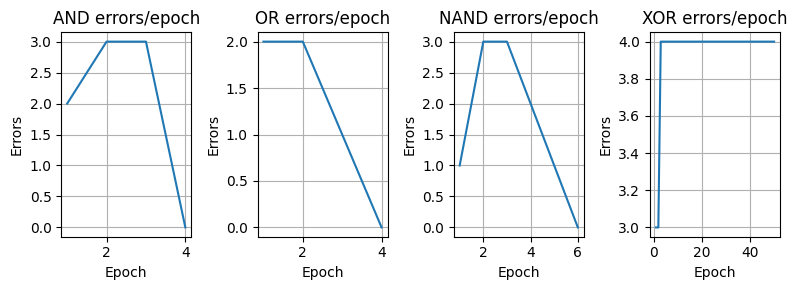

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, n_inputs, lr=0.1, epochs=50):
        self.w = np.zeros(n_inputs)   # weights
        self.b = 0.0                  # bias
        self.lr = lr
        self.epochs = epochs
        self.history = []             # errors per epoch

    def activation(self, z):
        return 1 if z >= 0 else 0     #if a) Z>+0, THEN pred =1    , otherwise, b) z<0, then pred =0

    def predict_single(self, x):
        return self.activation(np.dot(self.w, x) + self.b)   #calculating z= (w.x) + c

    def predict(self, X):
        return np.array([self.predict_single(x) for x in X])   # predict whole dataset, that is all rows

    def fit(self, X, y):
        self.history = []
        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                yhat = self.predict_single(xi)
                error = yi - yhat
                if error != 0:                        # error balancing
                    self.w += self.lr * error * xi    # w = w + (η * error * x)
                    self.b += self.lr * error         # b = b + (η * error)
                    errors += 1
            self.history.append(errors)
            if errors == 0:
                break


# Datasets for logic gates
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)

gates = {
    "AND":  np.array([0,0,0,1]),
    "OR":   np.array([0,1,1,1]),
    "NAND": np.array([1,1,1,0]),
    "XOR":  np.array([0,1,1,0])
}


# Train + Test on all gates
results = {}
for name, y in gates.items():
    p = Perceptron(n_inputs=2, lr=0.1, epochs=50)
    p.fit(X, y)
    preds = p.predict(X)
    acc = (preds == y).mean()
    results[name] = {"pred": preds.tolist(), "acc": acc, "weights": p.w, "bias": p.b, "history": p.history}


# Print results
for gate, info in results.items():
    print("\n==============================")
    print(f"Gate: {gate}")
    print("True      :", gates[gate].tolist())
    print("Predicted :", info["pred"])
    print(f"Accuracy  : {info['acc']*100:.1f}%")
    print(f"Weights   : {info['weights']}, Bias: {info['bias']:.2f}")


# Plot learning curve for AND vs XOR
plt.figure(figsize=(8,3))
for i, gate in enumerate(["AND","OR","NAND","XOR"], start=1):
    plt.subplot(1,4,i)
    plt.plot(range(1, len(results[gate]["history"])+1), results[gate]["history"])
    plt.title(f"{gate} errors/epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Errors")
    plt.grid(True)
plt.tight_layout()
plt.show()


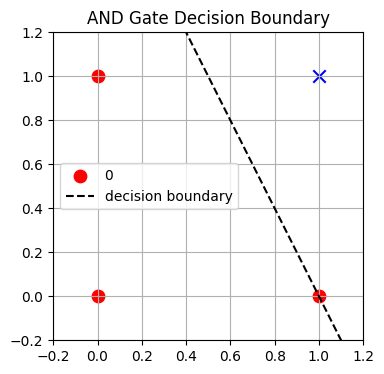

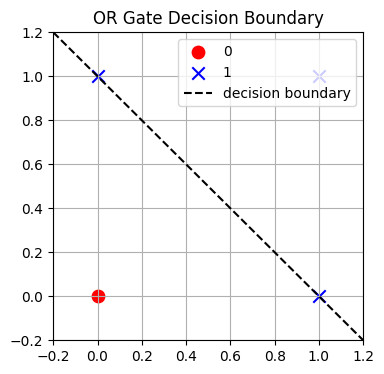

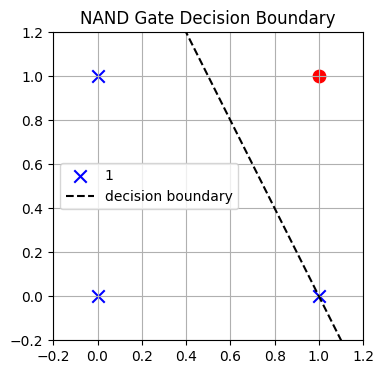

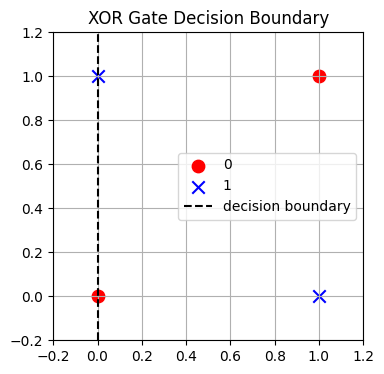

In [ ]:

def plot_decision_boundary(p, X, y, title):
    plt.figure(figsize=(4,4))
    for i, point in enumerate(X):
        if y[i] == 0:
            plt.scatter(point[0], point[1], color="red", marker="o", s=80, label="0" if i==0 else "")
        else:
            plt.scatter(point[0], point[1], color="blue", marker="x", s=80, label="1" if i==1 else "")

    if not np.allclose(p.w, 0):
        if p.w[1] != 0:
            x_vals = np.linspace(-0.2, 1.2, 100)
            y_vals = -(p.w[0]*x_vals + p.b)/p.w[1]
            plt.plot(x_vals, y_vals, "k--", label="decision boundary")
        else:
            x_val = -p.b/p.w[0]
            plt.axvline(x_val, color="k", linestyle="--", label="decision boundary")

    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


for gate, info in results.items():
    p = Perceptron(2)
    p.w, p.b = info["weights"], info["bias"]   # reuse trained model
    plot_decision_boundary(p, X, gates[gate], f"{gate} Gate Decision Boundary")



2-Layer Perceptron for XOR
True      : [0, 1, 1, 0]
Predicted : [0, 1, 1, 0]
Accuracy  : 100.00%
Converged at Epoch : 950

Final Weights & Biases:
W1 (Input -> Hidden):
 [[ 1.16362095  2.22857739]
 [-1.49059285 -1.70032989]]
b1 (Hidden Bias):
 [[-0.70285136  1.15305609]]
W2 (Hidden -> Output):
 [[ 1.6115822 ]
 [-1.80948126]]
b2 (Output Bias):
 [[0.76185768]]


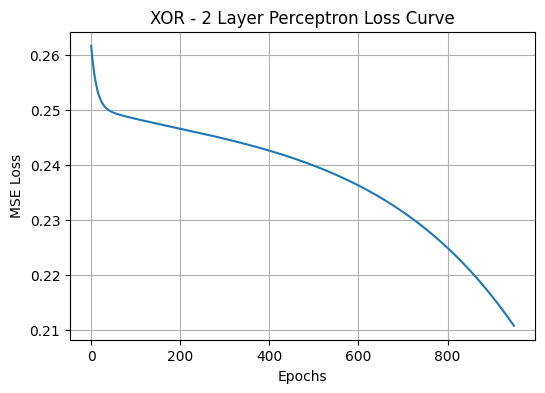

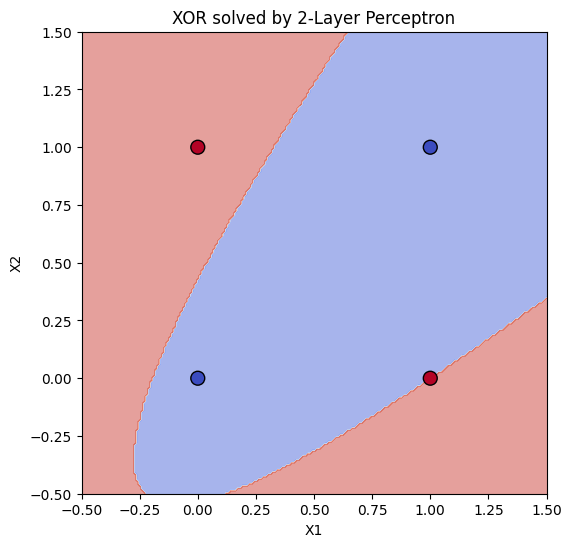

In [ ]:
# 2-Layer Perceptron (MLP) from scratch for XOR
class TwoLayerPerceptron:
    def __init__(self, n_inputs=2, n_hidden=2, lr=0.1, epochs=5000):
        # weights init
        self.W1 = np.random.randn(n_inputs, n_hidden)
        self.b1 = np.zeros((1, n_hidden))
        self.W2 = np.random.randn(n_hidden, 1)
        self.b2 = np.zeros((1,1))
        self.lr = lr
        self.epochs = epochs
        self.loss_history = []
        self.converged_epoch = None

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def sigmoid_derivative(self, a):
        return a*(1-a)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = len(y)
        # output layer error
        dz2 = output - y.reshape(-1,1)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        # hidden layer error
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # update
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def fit(self, X, y):
        for epoch in range(1, self.epochs+1):
            output = self.forward(X)
            loss = np.mean((y.reshape(-1,1) - output)**2)
            self.loss_history.append(loss)
            self.backward(X, y, output)


            preds = self.predict(X)
            if np.array_equal(preds.flatten(), y):
                self.converged_epoch = epoch
                break

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)



# Train on XOR with MLP
y_xor = gates["XOR"]
mlp = TwoLayerPerceptron()
mlp.fit(X, y_xor)
preds = mlp.predict(X)

# Accuracy
accuracy = np.mean(preds.flatten() == y_xor)

print("\n==============================")
print("2-Layer Perceptron for XOR")
print("True      :", y_xor.tolist())
print("Predicted :", preds.flatten().tolist())
print(f"Accuracy  : {accuracy*100:.2f}%")
print(f"Converged at Epoch : {mlp.converged_epoch if mlp.converged_epoch else 'Did not converge fully'}")

print("\nFinal Weights & Biases:")
print("W1 (Input -> Hidden):\n", mlp.W1)
print("b1 (Hidden Bias):\n", mlp.b1)
print("W2 (Hidden -> Output):\n", mlp.W2)
print("b2 (Output Bias):\n", mlp.b2)

plt.figure(figsize=(6,4))
plt.plot(mlp.loss_history)
plt.title("XOR - 2 Layer Perceptron Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


xx, yy = np.meshgrid(np.linspace(-0.5,1.5,200), np.linspace(-0.5,1.5,200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = mlp.predict(grid).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap="coolwarm")
plt.scatter(X[:,0], X[:,1], c=y_xor, s=100, edgecolors="k", cmap="coolwarm")
plt.title("XOR solved by 2-Layer Perceptron")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
